# Tut 12

In [2]:
%reset -f

In [4]:
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib.dates  as mdates
import seaborn           as sns
import numpy             as np
import statsmodels.api   as sm

from datetime                    import datetime
from statsmodels.tsa.stattools   import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima              import AutoARIMA
from arch                        import arch_model

### Load Data

In [6]:
df = pd.read_csv("INTC.csv")

In [7]:
df.index = pd.date_range(start='2000-11', periods=264, freq='MS')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2000-11-01,11/01/2000,44.3125,47.875000,36.0000,38.0625,22.745279,998090900
2000-12-01,12/01/2000,38.5000,38.500000,29.8125,30.0625,17.972366,1120692200
2001-01-01,1/01/2001,30.6875,38.593750,30.0000,37.0000,22.119848,1211434900
2001-02-01,2/01/2001,37.0625,38.234375,28.0000,28.5625,17.075613,909408600
2001-03-01,3/01/2001,28.2500,33.687500,24.5625,26.3125,15.739317,1421494900


In [10]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2022-06-01,6/01/2022,44.770000,44.930000,36.599998,37.410000,37.036106,783353000
2022-07-01,7/01/2022,37.090000,40.730000,35.240002,36.310001,35.947102,792918100
2022-08-01,8/01/2022,36.049999,37.689999,31.770000,31.920000,31.600975,899717100
2022-09-01,9/01/2022,31.570000,32.380001,25.740000,25.770000,25.770000,888833300
2022-10-01,10/01/2022,26.330000,27.840000,24.590000,25.910000,25.910000,449583700


### generate L1_Close and Return, remember to drop the first NA

In [11]:
df['Return'] = df['Close'] / df['Close'].shift(1) - 1

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
2000-11-01,11/01/2000,44.3125,47.875000,36.0000,38.0625,22.745279,998090900,NaN
2000-12-01,12/01/2000,38.5000,38.500000,29.8125,30.0625,17.972366,1120692200,-0.210181
2001-01-01,1/01/2001,30.6875,38.593750,30.0000,37.0000,22.119848,1211434900,0.230769
2001-02-01,2/01/2001,37.0625,38.234375,28.0000,28.5625,17.075613,909408600,-0.228041
2001-03-01,3/01/2001,28.2500,33.687500,24.5625,26.3125,15.739317,1421494900,-0.078775


In [13]:
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
2000-12-01,12/01/2000,38.5000,38.500000,29.8125,30.0625,17.972366,1120692200,-0.210181
2001-01-01,1/01/2001,30.6875,38.593750,30.0000,37.0000,22.119848,1211434900,0.230769
2001-02-01,2/01/2001,37.0625,38.234375,28.0000,28.5625,17.075613,909408600,-0.228041
2001-03-01,3/01/2001,28.2500,33.687500,24.5625,26.3125,15.739317,1421494900,-0.078775
2001-04-01,4/01/2001,26.0625,32.570000,22.2500,30.9100,18.489391,1232602500,0.174727


### Line plot

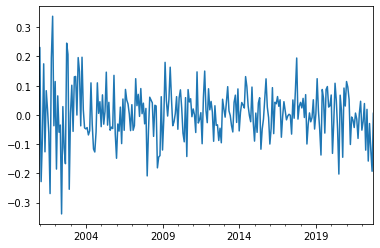

In [14]:
df['Return'].plot()
plt.show()

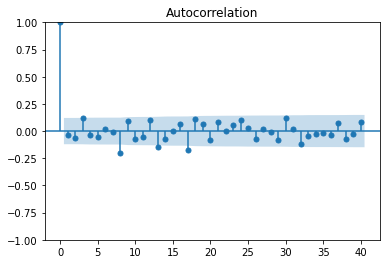

In [15]:
sm.graphics.tsa.plot_acf(df['Return'].dropna().values.squeeze(), lags=40)
plt.show()

In [16]:
X = df['Return'].values

In [17]:
result1=adfuller(X,regression='c',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result1[0], result1[1], result1[2]))

 ADF statistic: -16.886, 
 p-value: 0.000, 
 critical value: {'1%': -3.455558114028747, '5%': -2.872635586277424, '10%': -2.572682677000175}


In [18]:
result2=adfuller(X,regression='ct',autolag='BIC',regresults=True,store=True)
out = ' ADF statistic: {0:0.3f}, \n p-value: {1:0.3f}, \n critical value: {2}'
print(out.format(result2[0], result2[1], result2[2]))

 ADF statistic: -16.866, 
 p-value: 0.000, 
 critical value: {'1%': -3.993745412883642, '5%': -3.4273814105122966, '10%': -3.1369771257480235}


In [19]:
sm.stats.acorr_ljungbox(X, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,21.436034,0.01825


### Autoarima

In [20]:
model = AutoARIMA()
model.fit(X)

AutoARIMA()

In [21]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  263
Model:               SARIMAX(2, 0, 2)   Log Likelihood                 267.242
Date:                Sat, 05 Nov 2022   AIC                           -524.485
Time:                        13:11:13   BIC                           -506.624
Sample:                             0   HQIC                          -517.307
                                - 263                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9263      0.015    -61.532      0.000      -0.956      -0.897
ar.L2         -0.9888      0.009   -115.875      0.000      -1.006      -0.972
ma.L1          0.8972      0.036     25.160      0.0

In [22]:
mod = ARIMA(X, order=(2,0,2))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  263
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 267.384
Date:                Sat, 05 Nov 2022   AIC                           -522.768
Time:                        13:11:24   BIC                           -501.335
Sample:                             0   HQIC                          -514.154
                                - 263                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.005      0.518      0.605      -0.008       0.013
ar.L1         -0.9264      0.015    -61.446      0.000      -0.956      -0.897
ar.L2         -0.9888      0.009   -115.744      0.0

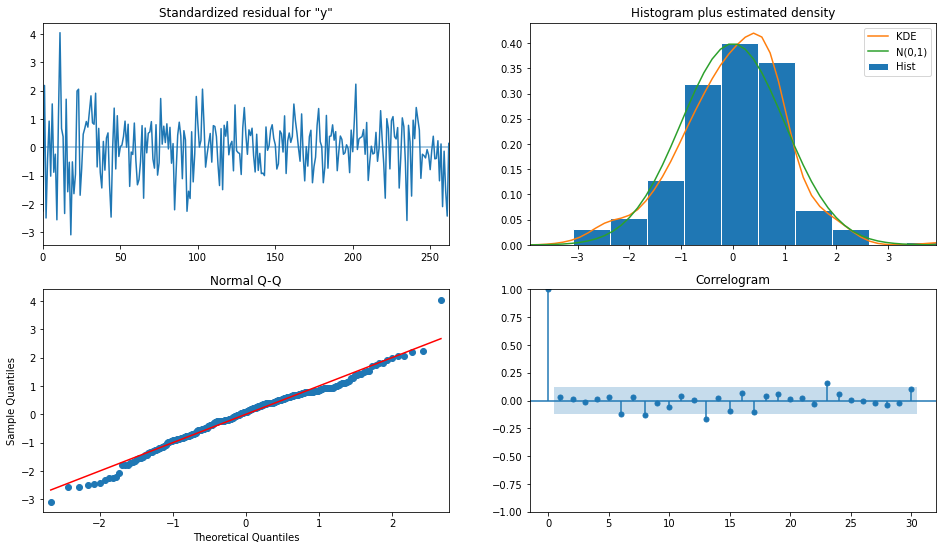

In [23]:
fig = plt.figure(figsize=(16,9))
fig = res.plot_diagnostics(fig=fig, lags=30)

### Generate Return^2

In [24]:
df['Return2'] = np.square(df['Close'])

df['L1_Return2'] = df['Return2'].shift(1)

df = df.dropna()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Return2,L1_Return2
2001-01-01,1/01/2001,30.6875,38.593750,30.0000,37.0000,22.119848,1211434900,0.230769,1369.000000,903.753906
2001-02-01,2/01/2001,37.0625,38.234375,28.0000,28.5625,17.075613,909408600,-0.228041,815.816406,1369.000000
2001-03-01,3/01/2001,28.2500,33.687500,24.5625,26.3125,15.739317,1421494900,-0.078775,692.347656,815.816406
2001-04-01,4/01/2001,26.0625,32.570000,22.2500,30.9100,18.489391,1232602500,0.174727,955.428100,692.347656
2001-05-01,5/01/2001,30.7700,32.500000,26.4000,27.0100,16.156532,966714700,-0.126173,729.540100,955.428100


In [31]:
# testing AR(1)
X = df['L1_Return2']
X = sm.add_constant(X)

Y = df['Return2']

model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Return2   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     4075.
Date:                Sat, 05 Nov 2022   Prob (F-statistic):          7.03e-161
Time:                        13:15:34   Log-Likelihood:                -1789.6
No. Observations:                 262   AIC:                             3583.
Df Residuals:                     260   BIC:                             3590.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.5041     21.831      1.489      0.1

### ARCH(1)

In [28]:
X = df['Return'].values

model = arch_model(X, mean='AR', vol='ARCH', p=1)
model_fit = model.fit()

print(model_fit.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 881.9841685715364
Iteration:      2,   Func. Count:     14,   Neg. LLF: 76272.31624656562
Iteration:      3,   Func. Count:     20,   Neg. LLF: -218.94626400212516
Iteration:      4,   Func. Count:     26,   Neg. LLF: -264.47106186333906
Iteration:      5,   Func. Count:     32,   Neg. LLF: -265.02834643782717
Iteration:      6,   Func. Count:     36,   Neg. LLF: -265.02834887120406
Iteration:      7,   Func. Count:     39,   Neg. LLF: -265.02834887120196
Optimization terminated successfully    (Exit mode 0)
            Current function value: -265.02834887120406
            Iterations: 7
            Function evaluations: 39
            Gradient evaluations: 7
                           AR - ARCH Model Results                            
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   

C:\Users\Micha\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008118. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


# GARCH(1,1)

In [27]:
model = arch_model(X, mean='AR', vol='GARCH', p=1, q=1)

model_fit = model.fit()

print(model_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1990810.4983426323
Iteration:      2,   Func. Count:     16,   Neg. LLF: -246.54356183981295
Iteration:      3,   Func. Count:     24,   Neg. LLF: -231.07890365241371
Iteration:      4,   Func. Count:     32,   Neg. LLF: -195.4509350060336
Iteration:      5,   Func. Count:     38,   Neg. LLF: 14868987.918511229
Iteration:      6,   Func. Count:     48,   Neg. LLF: 3284.7226085758493
Iteration:      7,   Func. Count:     56,   Neg. LLF: -272.080036258134
Iteration:      8,   Func. Count:     62,   Neg. LLF: 105.13708702773297
Iteration:      9,   Func. Count:     68,   Neg. LLF: -182.71434148945525
Iteration:     10,   Func. Count:     74,   Neg. LLF: 29.946118315366448
Iteration:     11,   Func. Count:     80,   Neg. LLF: -282.29733815774057
Iteration:     12,   Func. Count:     86,   Neg. LLF: -202.59759536177995
Iteration:     13,   Func. Count:     92,   Neg. LLF: -283.3144867785672
Iteration:     14,   Func. Count:     98,   Neg

C:\Users\Micha\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.008118. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
